In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1. Pyramid Chart

### Carga y preparación del dataset

Dataset público sobre personas desaparecidas durante la guerra civil española en Cataluña: [Cens de persones desaparegudes durant la Guerra Civil](https://analisi.transparenciacatalunya.cat/Legislaci-just-cia/Cens-de-persones-desaparegudes-durant-la-Guerra-Ci/u2ix-2jr6/about_data)

In [3]:
df = pd.read_csv("Cens_persones_desaparegudes_Guerra_Civil_20240422.csv")

# Filtramos df con campos relevantes y eliminamos valores nulos
df = df.filter(['Sexe', 'Data naixement', 'Data desaparició'], axis=1)
df = df.loc[~(df['Data naixement'].isna() | df['Data desaparició'].isna())]

# Calculamos edad de desaparición
df['Data naixement'] = pd.to_datetime(df['Data naixement'], errors='coerce')
df['Data desaparició'] = pd.to_datetime(df['Data desaparició'], errors='coerce', format='%d/%m/%Y')
df['Edad'] = df['Data desaparició'].dt.year - df['Data naixement'].dt.year


df = df.groupby(['Sexe', 'Edad']).size().reset_index(name='Cantidad')
male_df = df[df['Sexe'] == 'Home']
fem_df = df[df['Sexe'] == 'Dona']

### Visualización

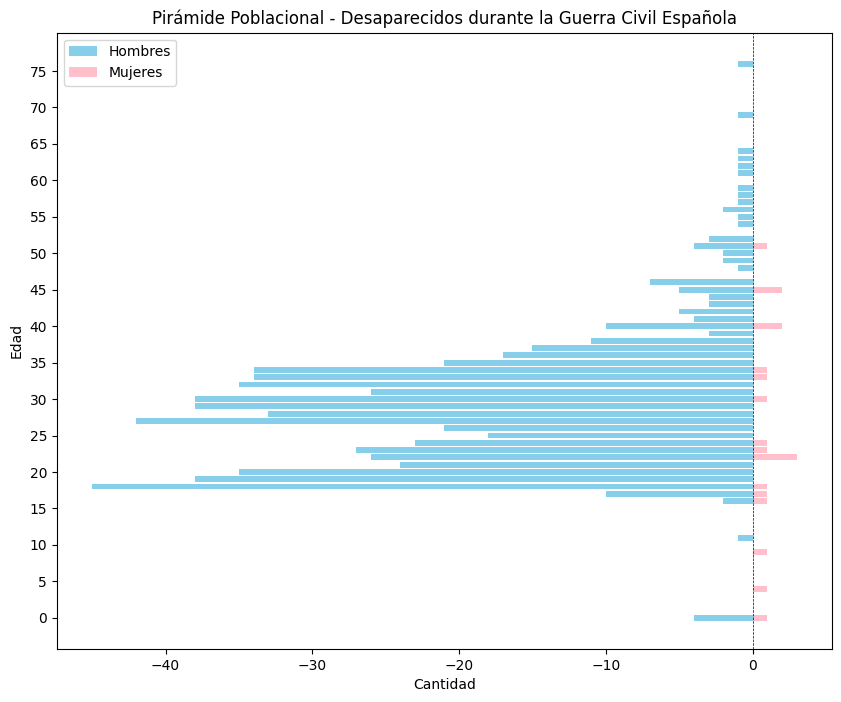

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

# Gráfica para hombres (barras a la izquierda, con valores negativos)
ax.barh(male_df['Edad'], -male_df['Cantidad'], color='skyblue', label='Hombres')

# Gráfica para mujeres (barras a la derecha, con valores positivos)
ax.barh(fem_df['Edad'], fem_df['Cantidad'], color='pink', label='Mujeres')

# Titulos, leyenda y ejes
ax.set_xlabel('Cantidad')
ax.set_ylabel('Edad')
ax.set_title('Pirámide Poblacional - Desaparecidos durante la Guerra Civil Española')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Línea central para separar sexos
ax.legend()
min_age = int(np.nanmin(df['Edad']))
max_age = int(np.nanmax(df['Edad']))
plt.yticks(range(min_age, max_age + 1, 5))
plt.show()

***
# 2. Slope Chart

### Carga y preparación del dataset

Dataset público sobre el estado de la sequía en Catalunya: [Estat de sequera per unitats d’explotació i municipis a les Conques Internes de Catalunya](https://analisi.transparenciacatalunya.cat/Medi-Ambient/Estat-de-sequera-per-unitats-d-explotaci-i-municip/i5n8-43cw/about_data)

In [5]:
df = pd.read_csv("Estat_de_sequera_Catalunya_20240421.csv")
df.head()

,Data canvi estat sequera,Codi unitat explotació,Unitat explotació,Codi estat sequera hidrològic,Estat sequera hidrològic,Codi estat sequera pluviomètric,Estat sequera pluviomètric,Codi Municipi,Nom Municipi
0,08/04/2024,7,Capçalera del Ter,8,EMERGÈNCIA,3,SEQUERA EXTREMA,82107,Sant Feliu de Codines
1,08/04/2024,16,Mig Llobregat,8,EMERGÈNCIA,3,SEQUERA EXTREMA,82917,Vacarisses
2,12/03/2024,9,Embassament Darnius- Boadella,9,EMERGÈNCIA II,3,SEQUERA EXTREMA,170307,Cabanes
3,12/03/2024,9,Embassament Darnius- Boadella,9,EMERGÈNCIA II,3,SEQUERA EXTREMA,170329,Cadaqués
4,12/03/2024,9,Embassament Darnius- Boadella,9,EMERGÈNCIA II,3,SEQUERA EXTREMA,170470,Castelló d'Empúries


In [6]:
# Filtramos municipios
municipios = ["Tarragona", "Badalona", "Figueres"]
df = df[df["Nom Municipi"].isin(municipios)]

# Corregimos datos
df.loc[df['Codi estat sequera hidrològic'] == 121, ['Codi estat sequera hidrològic', 'Estat sequera hidrològic']] = [8, "EMERGÈNCIA"]
df.loc[df['Codi estat sequera hidrològic'] == 120, ['Codi estat sequera hidrològic', 'Estat sequera hidrològic']] = [7, "EXCEPCIONALITAT"]

# Nos quedamos con el último registro para cada año y municipio.
df["Data"] = pd.to_datetime(df["Data canvi estat sequera"], format="%d/%m/%Y")
df["Año"] = df["Data"].dt.year
df = df.groupby(["Nom Municipi", "Año"]).apply(lambda x: x.loc[x["Data"].idxmax()]).reset_index(drop=True)
df = df.sort_values(by="Codi estat sequera hidrològic", ascending=False)

/tmp/ipykernel_27365/3916712829.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["Nom Municipi", "Año"]).apply(lambda x: x.loc[x["Data"].idxmax()]).reset_index(drop=True)


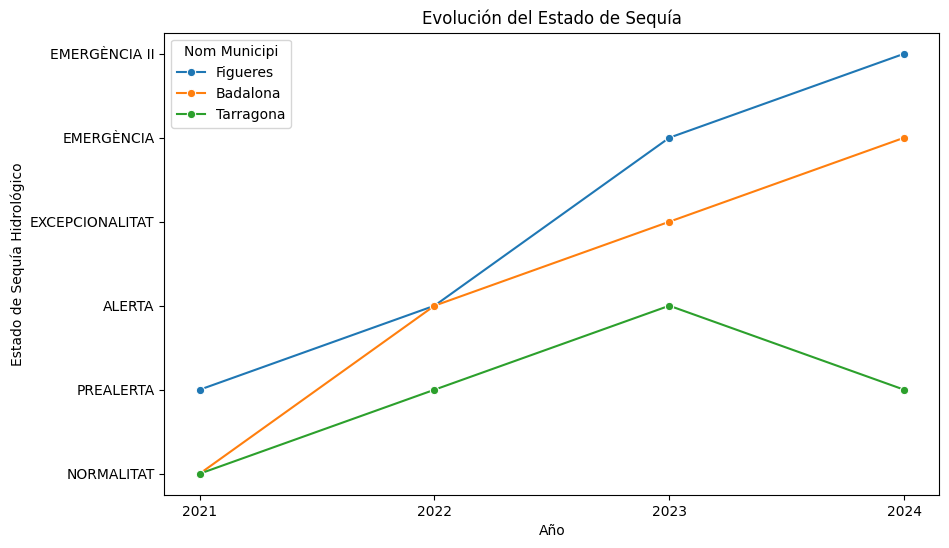

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x="Año", y="Estat sequera hidrològic", hue="Nom Municipi", marker="o")

ax.set_xticks([2021, 2022, 2023, 2024])
ax.set_title("Evolución del Estado de Sequía")
ax.set_xlabel("Año")
ax.set_ylabel("Estado de Sequía Hidrológico")

plt.show()

#### Referencias

*https://datavizproject.com/data-type/slope-chart/*

*https://seaborn.pydata.org/generated/seaborn.lineplot.html*

*https://towardsdatascience.com/slope-charts-why-how-11c2a0bc28be*

*https://dataviz.unhcr.org/tools/python/python_slope_chart_2.html*

***
# 3. OHLC Chart

### Carga y preparación del dataset

Dataset público sobre el histórico de precios del Bitcoin: [Bitcoin Historical Data](https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data)

In [108]:
import pandas as pd

df_btc = pd.read_csv("bitcoin_1min_data_2012-01-01_to_2021-03-31.csv")
df_btc['Date'] = pd.to_datetime(df_btc['Timestamp'], unit='s')

# Filtrar para obtener solo el rango entre dos horas
df_filtered = df_btc[
    (df_btc['Date'] >= '2021-03-01 15:00:00') & 
    (df_btc['Date'] < '2021-03-01 16:00:00')
]

In [1]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=df_filtered['Date'],
                open=df_filtered['Open'],
                high=df_filtered['High'],
                low=df_filtered['Low'],
                close=df_filtered['Close']))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.write_html('plotly_ohlc_graph.html')

SyntaxError: invalid syntax (3635745662.py, line 10)

In [ ]:
from IPython.display import display, HTML

# Cargar el contenido del archivo HTML
with open("plotly_ohlc_graph.html", "r") as f:
    plotly_html = f.read()

# Mostrar el contenido HTML en el cuaderno
display(HTML(plotly_html))

#### Referencias

*https://datavizcatalogue.com/methods/OHLC_chart.html*

*https://plotly.com/python/ohlc-charts/*